In [ ]:
!pip install opencv-python tensorflow


1). To understand and implement feature extraction from image data.

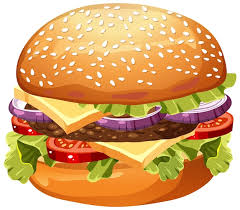

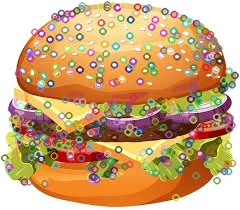

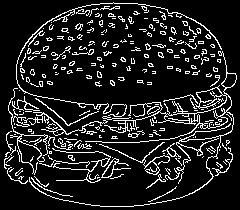

Number of edges detected: 6559


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image_path = '/content/Burger.jfif'
image_color = cv2.imread(image_path)


if image_color is None:
    print(f"Error: Image not found at {image_path}. Check the path.")
else:
    # Convert the color image to grayscale for processing
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(image_gray, None)

    # Draw keypoints on the color image
    output_image_sift = cv2.drawKeypoints(image_color, keypoints, None)

    # Apply Canny edge detection on the grayscale image
    edges = cv2.Canny(image_gray, threshold1=100, threshold2=200)

    # Count the number of edges
    num_edges = np.count_nonzero(edges)

    # Display the original color image, SIFT keypoints, and edge-detected images
    cv2_imshow(image_color)
    cv2_imshow(output_image_sift)
    cv2_imshow(edges)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours to avoid noise
    seed_contours = [c for c in contours if cv2.contourArea(c) > 100]


    # Print the number of edges detected and seeds counted
    print(f"Number of edges detected: {num_edges}")

 2) .To explore feature extraction from audio data.

Sample Rate: 22050 Hz
Duration: 60.05 seconds
Number of Samples: 1323995
Mean MFCCs: [-387.2518     181.87296     17.112335    -5.8016925   11.087035
   14.209874    12.634605     3.7001877   -2.41845     -3.0445027
   -5.013696    -5.206703    -3.7421467]
Mean Zero-Crossing Rate: 0.0393
Mean Spectral Centroid: 681.26 Hz


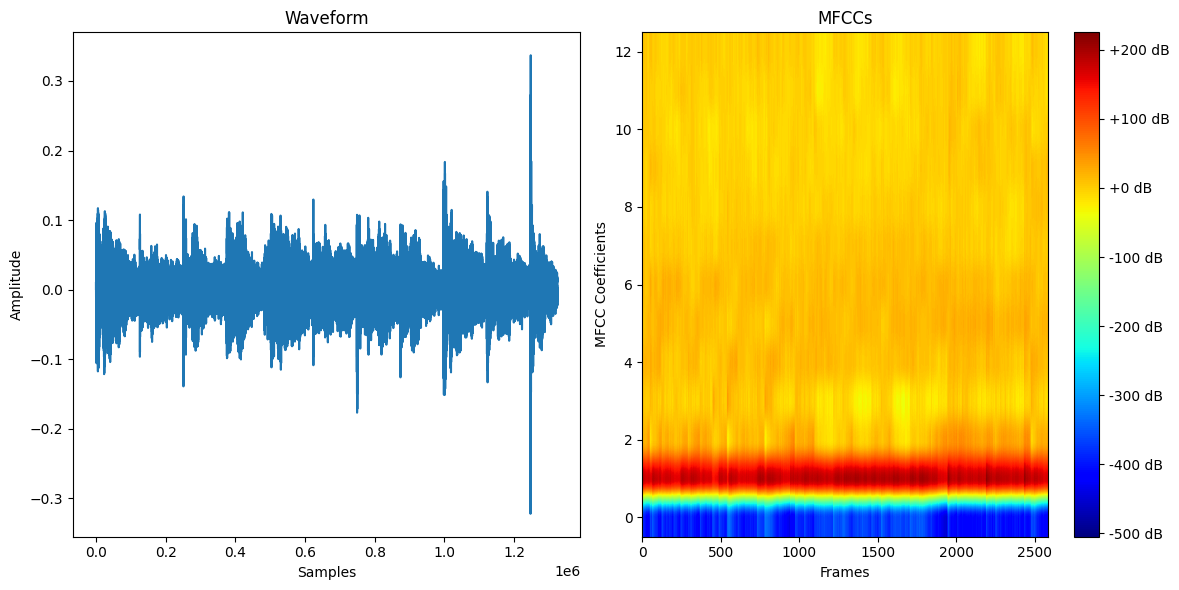

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
file_path = '/content/audio.wav'
y, sr = librosa.load(file_path)

# Extract audio details
duration = librosa.get_duration(y=y, sr=sr)
num_samples = len(y)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)

# Extract Zero-Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)
zcr_mean = np.mean(zcr)

# Extract Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroid_mean = np.mean(spectral_centroid)

# Print audio details
print(f"Sample Rate: {sr} Hz")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Samples: {num_samples}")
print("Mean MFCCs:", mfccs_mean)
print(f"Mean Zero-Crossing Rate: {zcr_mean:.4f}")
print(f"Mean Spectral Centroid: {spectral_centroid_mean:.2f} Hz")

# Plot the waveform
plt.figure(figsize=(12, 6))

# Waveform plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# MFCCs plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mfccs, aspect='auto', cmap='jet', origin='lower')
plt.title('MFCCs')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frames')
plt.ylabel('MFCC Coefficients')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

3). To perform text data feature engineering using tokenization, embeddings, and TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_text_features(documents):
    # Initialize the TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the documents
    tfidf_matrix = vectorizer.fit_transform(documents)

    return tfidf_matrix.toarray(), vectorizer.get_feature_names_out()

# Example documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one."
]

# Call the function to extract text features
text_features, feature_names = extract_text_features(documents)

# Print the results
print("Text Features (TF-IDF):\n", text_features)
print("Feature Names:\n", feature_names)

Text Features (TF-IDF):
 [[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]
Feature Names:
 ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


4). To create polynomial and interaction features from numerical data.

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_features(data):
    poly = PolynomialFeatures(degree=2, interaction_only=False)
    polynomial_features = poly.fit_transform(data)
    return polynomial_features

# Sample numerical data
numerical_data = pd.DataFrame({
    'feature1': [1, 2, 3],
    'feature2': [4, 5, 6]
})

# Create polynomial features
polynomial_features = create_polynomial_features(numerical_data)
print("Polynomial Features:\n", polynomial_features)


Polynomial Features:
 [[ 1.  1.  4.  1.  4. 16.]
 [ 1.  2.  5.  4. 10. 25.]
 [ 1.  3.  6.  9. 18. 36.]]
